In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df = pd.read_csv("D:\Digital Portfolio\Data Projects\ML GOOGL\GOOGL (1).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,08/19/04,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,08/20/04,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,08/23/04,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,08/24/04,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,08/25/04,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...,...
3927,03/26/20,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
3928,03/27/20,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
3929,03/30/20,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800
3930,03/31/20,1148.729980,1173.400024,1136.719971,1161.949951,1161.949951,3261400


In [37]:
df.index

RangeIndex(start=0, stop=3932, step=1)

In [38]:
# Preprocess the data
X = df[['Open', 'High', 'Low', 'Volume']]  # Select features
y = df['Close']  # Target variable

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 14.24413755146501


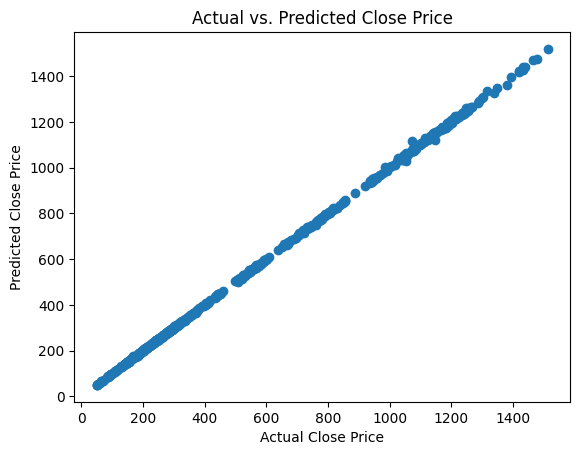

In [43]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()

<AxesSubplot: >

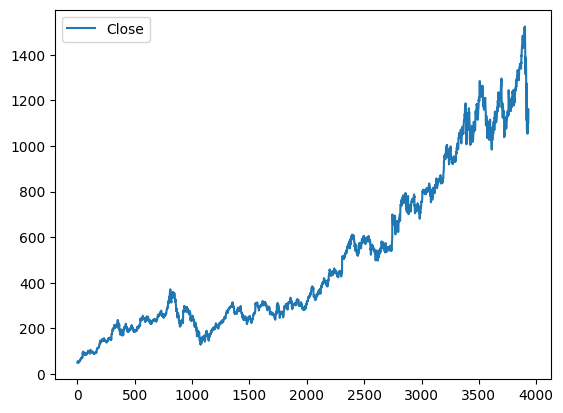

In [44]:
df.plot.line(y="Close", use_index = True)

In [45]:
# Visualize feature importance
feature_importance = model.coef_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

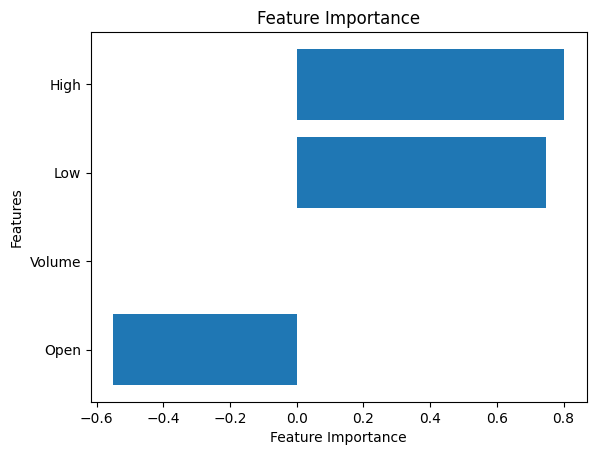

In [46]:
plt.barh(range(len(feature_names)), feature_importance[sorted_indices])
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

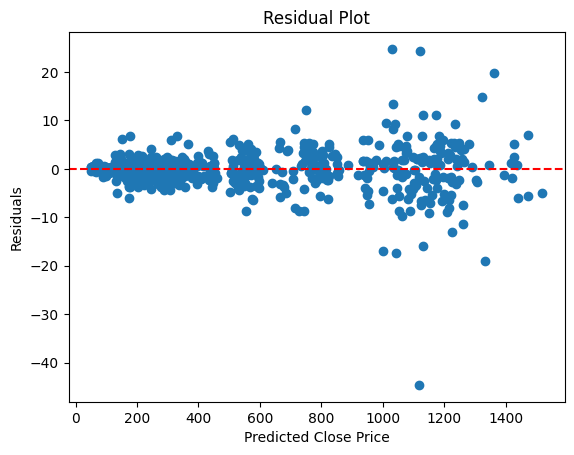

In [47]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Time Series Analysis

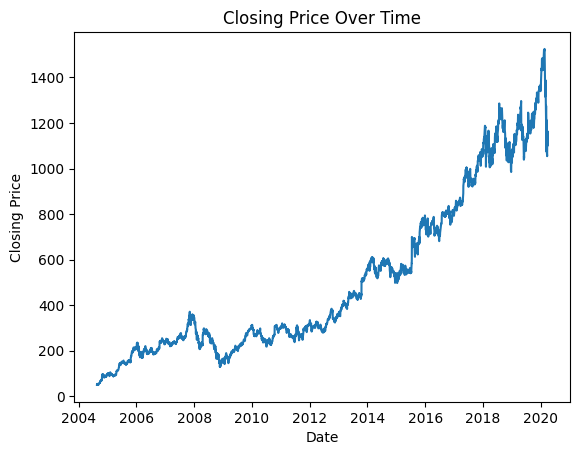

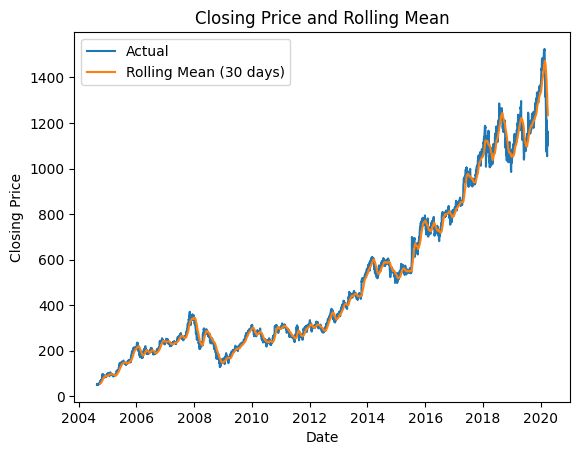

In [48]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the closing price over time
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.show()

# Calculate rolling mean and plot
rolling_mean = df['Close'].rolling(window=30).mean()
plt.plot(df['Close'], label='Actual')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price and Rolling Mean')
plt.legend()
plt.show()


Prediction on Future Data:

c:\Users\Cesar Gutierrez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


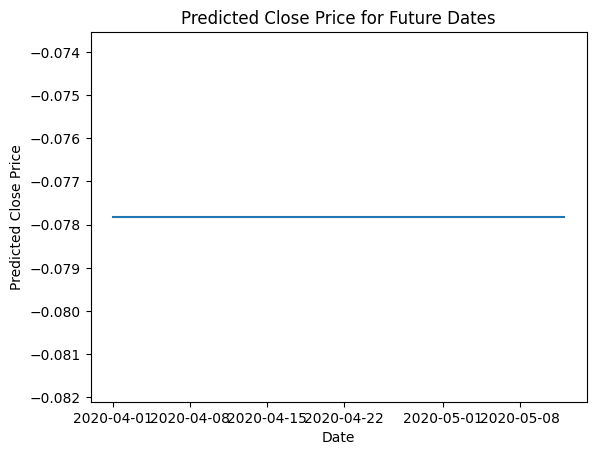

In [49]:
# Create a new DataFrame for future dates
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='B')

# Generate feature values for future dates
future_features = pd.DataFrame(index=future_dates, columns=X.columns)

# Fill in the feature values using an appropriate method (e.g., mean, median)
future_features.fillna(X.mean(), inplace=True)

# Scale the features
future_features_scaled = scaler.transform(future_features)

# Make predictions on future data
future_predictions = model.predict(future_features_scaled)

# Plot predicted close price for future dates
plt.plot(future_dates, future_predictions)
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.title('Predicted Close Price for Future Dates')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate a random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest - Mean Squared Error:', rf_mse)
print('Random Forest - R2 Score:', rf_r2)

# Train and evaluate a support vector regression model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print('SVR - Mean Squared Error:', svr_mse)
print('SVR - R2 Score:', svr_r2)


Random Forest - Mean Squared Error: 23.614224209385146
Random Forest - R2 Score: 0.9998227855608809
SVR - Mean Squared Error: 11505.965995273185
SVR - R2 Score: 0.9136527504652954


c:\Users\Cesar Gutierrez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


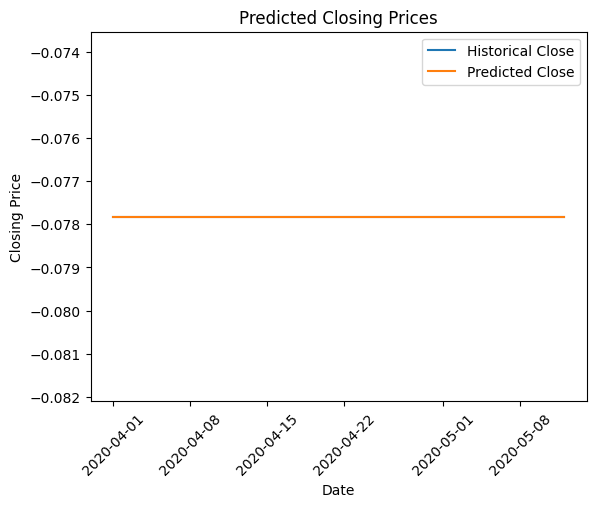

In [55]:
# Generate future dates
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='B')

# Generate future features
future_features = pd.DataFrame(index=future_dates, columns=X.columns)
future_features.fillna(X.mean(), inplace=True)
future_features_scaled = scaler.transform(future_features)

# Make predictions on future data
future_predictions = model.predict(future_features_scaled)

# Create a DataFrame for future predictions
predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions})
predictions_df.set_index('Date', inplace=True)

# Plot the predicted closing prices
plt.plot(future_dates, future_predictions, label='Historical Close')
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predicted Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()
